# Montecarlo aproximated function



In [1]:
import sys
sys.path.append('../')  # Enable importing from `src` folder

In [4]:
%matplotlib inline
from collections import defaultdict
from typing import List

import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

import gym

import src.agents as agents
import src.episode as episode
import src.environment as environment
import src.aux_plots as aux_plots

In [5]:
def print_result(i, scores, total_reward, score):
    if i % 10 == 0:
        print(f"Run [{i:4}] - Total reward: {total_reward:7.2f} Mean scores: {sum(scores) / len(scores):.2f} Means Scores[:-10]: {sum(scores[-10:]) / len(scores[-10:]):5.2f} Score: {score:2} ")

In [6]:
RAM_mask = [
      14  # Chicken Y
    , 16  # Chicken Lane Collide
    , 108, 109, 110, 111, 112, 113, 114, 115, 116, 117  # Car X Coords
]

In [7]:
def reduce_state(ob):
    # Doesn't matter where we were hit
    ob[16] = 1 if ob[16] != 255 else 0

    # Reduce chicken y-position
    ob[14] = ob[14] // 3

    for b in range(108, 118):
        # The chicken is in the x-posistion ~49
        if ob[b] < 20 or ob[b] > 80:
            # We don't need to represent cars far from the chicken
            ob[b] = 0
        else:
            # Reduce the cars x-positions sample space
            ob[b] = ob[b] // 3

    return ob

# Reward Policy

In [8]:
def reward_policy(reward, ob, action):
    if reward == 1:
        reward = reward_policy.REWARD_IF_CROSS
    elif ob[16] == 1:  # Collision!
        reward = reward_policy.REWARD_IF_COLISION
    elif action != 1:  # Don't incentivate staying still
        reward = reward_policy.REWARD_IF_STILL

    return reward

# Hyper Parameters

In [9]:
GAMMA = 0.99
AVAILABLE_ACTIONS = 2
N0 = 2.5

reward_policy.REWARD_IF_CROSS = 50
reward_policy.REWARD_IF_COLISION = -1
reward_policy.REWARD_IF_STILL = -0.1

# MonteCarlo

In [ ]:
env, initial_state = environment.get_env()

In [ ]:
agent = agents.MonteCarloControl(gamma=GAMMA, available_actions=AVAILABLE_ACTIONS, N0=N0)

In [ ]:
def MonteCarloES(RAM_mask: List[int], render: bool=False):
    epi = episode.generate_episode(env, reduce_state=reduce_state, reward_policy=reward_policy, agent=agent, RAM_mask=RAM_mask, render=render)
    return agent.update_policy(epi)

In [ ]:
episode.generate_episode(env, reduce_state=reduce_state, reward_policy=reward_policy, agent=agent, RAM_mask=RAM_mask, render=False)

In [12]:
import pickle

In [13]:
def saveHistory(config,scores,total_rewards):
    base="history/"
    with open(base+"scores_"+config+".pickle", 'wb') as handle:
        pickle.dump(scores, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    with open(base+"total_rewards_"+config+".pickle", 'wb') as handle:
        pickle.dump(total_rewards, handle, protocol=pickle.HIGHEST_PROTOCOL)    
    print("Scores and Total rewards for "+config+" saved")
def loadHistory(fileDir):
    with open(fileDir, 'rb') as handle:
        data = pickle.load(handle)
        return data

In [14]:
%%time
MonteCarloES(RAM_mask=RAM_mask, render=False)

CPU times: user 2.53 s, sys: 55 µs, total: 2.53 s
Wall time: 2.53 s


(12, 401.69999999999123)

In [15]:
scores = []
total_rewards = []

In [15]:
%%time

n_runs = 2500

for i in range(n_runs):
    render = i % 201 == 200

    score, total_reward = MonteCarloES(RAM_mask=RAM_mask, render=render)

    scores.append(score)
    total_rewards.append(total_reward)

    print_result(i, scores, total_reward, score)

Run [   0] - Total reward:  464.60 Mean scores: 13.00 Means Scores[:-10]: 13.00 Score: 13 
Run [  10] - Total reward:  443.10 Mean scores: 11.91 Means Scores[:-10]: 11.80 Score: 13 
Run [  20] - Total reward:  450.00 Mean scores: 11.95 Means Scores[:-10]: 12.00 Score: 13 
Run [  30] - Total reward:  459.10 Mean scores: 12.06 Means Scores[:-10]: 12.30 Score: 13 
Run [  40] - Total reward:  464.70 Mean scores: 11.95 Means Scores[:-10]: 11.60 Score: 13 
Run [  50] - Total reward:  457.90 Mean scores: 12.00 Means Scores[:-10]: 12.20 Score: 13 
Run [  60] - Total reward:  400.60 Mean scores: 12.00 Means Scores[:-10]: 12.00 Score: 12 
Run [  70] - Total reward:  559.50 Mean scores: 12.06 Means Scores[:-10]: 12.40 Score: 15 
Run [  80] - Total reward:  285.40 Mean scores: 12.00 Means Scores[:-10]: 11.60 Score: 10 
Run [  90] - Total reward:  294.50 Mean scores: 12.01 Means Scores[:-10]: 12.10 Score: 10 
Run [ 100] - Total reward:  407.00 Mean scores: 12.08 Means Scores[:-10]: 12.70 Score: 12 

Run [ 910] - Total reward:  458.40 Mean scores: 13.07 Means Scores[:-10]: 13.80 Score: 13 
Run [ 920] - Total reward:  622.70 Mean scores: 13.08 Means Scores[:-10]: 14.00 Score: 16 
Run [ 930] - Total reward:  576.40 Mean scores: 13.08 Means Scores[:-10]: 13.30 Score: 15 
Run [ 940] - Total reward:  509.20 Mean scores: 13.09 Means Scores[:-10]: 13.90 Score: 14 
Run [ 950] - Total reward:  458.20 Mean scores: 13.09 Means Scores[:-10]: 13.00 Score: 13 
Run [ 960] - Total reward:  413.70 Mean scores: 13.09 Means Scores[:-10]: 13.30 Score: 12 
Run [ 970] - Total reward:  516.90 Mean scores: 13.10 Means Scores[:-10]: 13.30 Score: 14 
Run [ 980] - Total reward:  406.20 Mean scores: 13.10 Means Scores[:-10]: 13.40 Score: 12 
Run [ 990] - Total reward:  465.80 Mean scores: 13.11 Means Scores[:-10]: 13.90 Score: 13 
Run [1000] - Total reward:  523.20 Mean scores: 13.11 Means Scores[:-10]: 13.50 Score: 14 
Run [1010] - Total reward:  627.60 Mean scores: 13.13 Means Scores[:-10]: 14.90 Score: 16 

Run [1820] - Total reward:  520.00 Mean scores: 13.20 Means Scores[:-10]: 13.40 Score: 14 
Run [1830] - Total reward:  461.40 Mean scores: 13.20 Means Scores[:-10]: 13.00 Score: 13 
Run [1840] - Total reward:  353.90 Mean scores: 13.20 Means Scores[:-10]: 12.90 Score: 11 
Run [1850] - Total reward:  461.10 Mean scores: 13.20 Means Scores[:-10]: 13.10 Score: 13 
Run [1860] - Total reward:  462.70 Mean scores: 13.20 Means Scores[:-10]: 13.80 Score: 13 
Run [1870] - Total reward:  464.80 Mean scores: 13.20 Means Scores[:-10]: 13.20 Score: 13 
Run [1880] - Total reward:  574.10 Mean scores: 13.20 Means Scores[:-10]: 13.60 Score: 15 
Run [1890] - Total reward:  565.50 Mean scores: 13.20 Means Scores[:-10]: 13.20 Score: 15 
Run [1900] - Total reward:  517.10 Mean scores: 13.20 Means Scores[:-10]: 12.80 Score: 14 
Run [1910] - Total reward:  464.30 Mean scores: 13.20 Means Scores[:-10]: 13.70 Score: 13 
Run [1920] - Total reward:  453.80 Mean scores: 13.20 Means Scores[:-10]: 13.20 Score: 13 

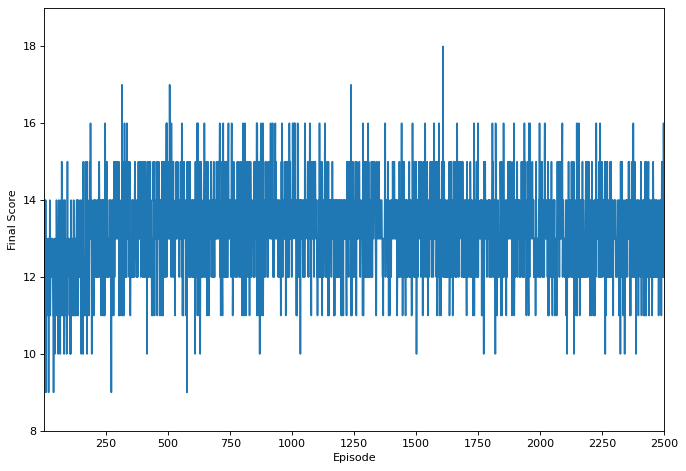

In [21]:
aux_plots.plot_scores(scores)

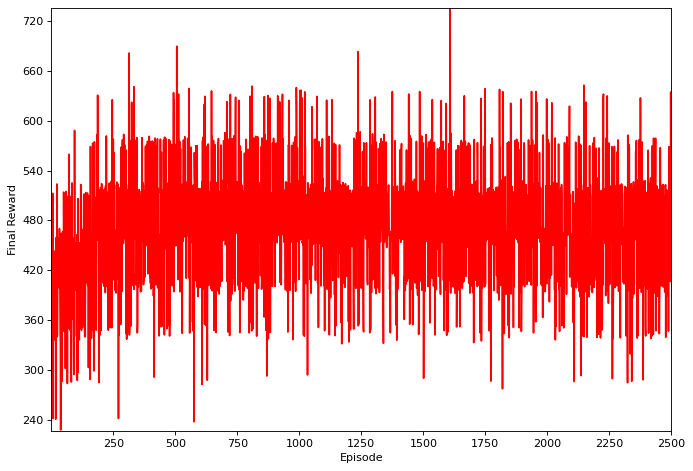

In [22]:
aux_plots.plot_rewards(total_rewards)

In [28]:
saveHistory("Episode2500",scores,total_rewards)

Scores and Total rewards for Episode2500 saved


# MonteCarlo Approximation

In [10]:
env, initial_state = environment.get_env()

In [11]:
agent = agents.MonteCarloAprox(gamma=GAMMA, available_actions=AVAILABLE_ACTIONS, N0=N0)

In [12]:
scores = []
total_rewards = []

In [13]:
def MonteCarloAprox(RAM_mask: List[int], render: bool=False):
    epi = episode.generate_episode(env, reduce_state=reduce_state, reward_policy=reward_policy, agent=agent, RAM_mask=RAM_mask, render=render)
    return agent.update_policy(epi)

In [14]:
from tqdm import tqdm

In [15]:
%%time

n_runs = 1

for i in tqdm(range(n_runs)):
    render = i % 201 == 200

    score, total_reward = MonteCarloAprox(RAM_mask=RAM_mask, render=render)

    scores.append(score)
    total_rewards.append(total_reward)

    print_result(i, scores, total_reward, score)

  0%|          | 0/1 [00:00<?, ?it/s]

S130: 
b'\x1c\x00\x1a\x00\x00\x0c\x19\x00\x00\t\x14\x1a'
Length S130: 
12
Type S130: 
<class 'numpy.bytes_'>
Buffer S130: 
[28  0 26  0  0 12 25  0  0  9 20 26]
S131: 
b'\x1c\x00\x1a\x00\x00\r\x1a\x00\x00\t\x14\x1a'
Length S131: 
12
Type S131: 
<class 'numpy.bytes_'>
Buffer S131: 
[28  0 26  0  0 13 26  0  0  9 20 26]
S132: 
b'\x1c\x00\x00\x00\x00\r\x00\x19\x00\x08\x13\x1a'
Length S132: 
12
Type S132: 
<class 'numpy.bytes_'>
Buffer S132: 
[28  0  0  0  0 13  0 25  0  8 19 26]
S133: 
b'\x1c\x00\x00\x00\x00\x0e\x00\x19\x00\x08\x13\x1a'
Length S133: 
12
Type S133: 
<class 'numpy.bytes_'>
Buffer S133: 
[28  0  0  0  0 14  0 25  0  8 19 26]
S134: 
b'\x1c\x00\x00\x00\x00\x0e\x00\x17\x00\x07\x13\x1a'
Length S134: 
12
Type S134: 
<class 'numpy.bytes_'>
Buffer S134: 
[28  0  0  0  0 14  0 23  0  7 19 26]
S135: 
b'\x1d\x00\x00\x00\x00\x0f\x00\x17\x00\x07\x13\x19'
Length S135: 
12
Type S135: 
<class 'numpy.bytes_'>
Buffer S135: 
[29  0  0  0  0 15  0 23  0  7 19 25]
S136: 
b'\x1e\x00\x00\x00\x00\

<class 'numpy.bytes_'>
Buffer S460: 
[42  0  0  8  0 16  0 20  0  6  0 14]
S461: 
b'*\x00\x00\x08\x00\x10\x00\x14\x00\x06\x00\x0e'
Length S461: 
12
Type S461: 
<class 'numpy.bytes_'>
Buffer S461: 
[42  0  0  8  0 16  0 20  0  6  0 14]
S462: 
b'*\x00\x00\x08\x00\x11\x00\x13\x00\x00\x00\x0e'
Length S462: 
12
Type S462: 
<class 'numpy.bytes_'>
Buffer S462: 
[42  0  0  8  0 17  0 19  0  0  0 14]
S463: 
b'*\x00\x00\x08\x00\x11\x00\x12\x00\x00\x00\x0e'
Length S463: 
12
Type S463: 
<class 'numpy.bytes_'>
Buffer S463: 
[42  0  0  8  0 17  0 18  0  0  0 14]
S464: 
b'*\x00\x00\t\x00\x11\x00\x11\x00\x00\x00\x0e'
Length S464: 
12
Type S464: 
<class 'numpy.bytes_'>
Buffer S464: 
[42  0  0  9  0 17  0 17  0  0  0 14]
S465: 
b'*\x00\x00\t\x00\x12\x00\x10\x00\x00\x00\r'
Length S465: 
12
Type S465: 
<class 'numpy.bytes_'>
Buffer S465: 
[42  0  0  9  0 18  0 16  0  0  0 13]
S466: 
b'*\x00\x00\t\x00\x12\x00\x0f\x00\x00\x00\r'
Length S466: 
12
Type S466: 
<class 'numpy.bytes_'>
Buffer S466: 
[42  0  0  9 

Buffer S762: 
[25  0  0  0  0  0 12  0  0 13 23  8]
S763: 
b'\x19\x00\x00\x00\x00\x06\r\x00\x00\r\x17\x08'
Length S763: 
12
Type S763: 
<class 'numpy.bytes_'>
Buffer S763: 
[25  0  0  0  0  6 13  0  0 13 23  8]
S764: 
b'\x1a\x00\x00\x00\x00\x07\x0e\x00\x00\r\x17\x07'
Length S764: 
12
Type S764: 
<class 'numpy.bytes_'>
Buffer S764: 
[26  0  0  0  0  7 14  0  0 13 23  7]
S765: 
b'\x1a\x01\x00\x00\x00\x07\x0e\x00\x00\x0c\x16\x07'
Length S765: 
12
Type S765: 
<class 'numpy.bytes_'>
Buffer S765: 
[26  1  0  0  0  7 14  0  0 12 22  7]
S766: 
b'\x1a\x01\x00\x00\x00\x08\x0f\x00\x00\x0c\x16\x07'
Length S766: 
12
Type S766: 
<class 'numpy.bytes_'>
Buffer S766: 
[26  1  0  0  0  8 15  0  0 12 22  7]
S767: 
b'\x19\x00\x00\x00\x00\x08\x10\x00\x00\x0c\x16\x07'
Length S767: 
12
Type S767: 
<class 'numpy.bytes_'>
Buffer S767: 
[25  0  0  0  0  8 16  0  0 12 22  7]
S768: 
b'\x18\x00\x00\x00\x00\x08\x11\x00\x00\x0b\x16\x07'
Length S768: 
12
Type S768: 
<class 'numpy.bytes_'>
Buffer S768: 
[24  0  0  0  

S1275: 
b' \x01\x00\x00\x00\x00\x00\x10\x08\x00\x00\x0e'
Length S1275: 
12
Type S1275: 
<class 'numpy.bytes_'>
Buffer S1275: 
[32  1  0  0  0  0  0 16  8  0  0 14]
S1276: 
b'\x1f\x00\x00\x00\x00\x00\x00\x0f\x07\x00\x00\r'
Length S1276: 
12
Type S1276: 
<class 'numpy.bytes_'>
Buffer S1276: 
[31  0  0  0  0  0  0 15  7  0  0 13]
S1277: 
b'\x1e\x00\x00\x00\x00\x00\x00\x0e\x07\x00\x00\r'
Length S1277: 
12
Type S1277: 
<class 'numpy.bytes_'>
Buffer S1277: 
[30  0  0  0  0  0  0 14  7  0  0 13]
S1278: 
b'\x1c\x00\x00\x00\x00\x00\x00\r\x00\x00\x00\r'
Length S1278: 
12
Type S1278: 
<class 'numpy.bytes_'>
Buffer S1278: 
[28  0  0  0  0  0  0 13  0  0  0 13]
S1279: 
b'\x1b\x00\x00\x00\x00\x00\x00\x0c\x00\x00\x00\r'
Length S1279: 
12
Type S1279: 
<class 'numpy.bytes_'>
Buffer S1279: 
[27  0  0  0  0  0  0 12  0  0  0 13]
S1280: 
b'\x1a\x00\x00\x00\x00\x00\x00\n\x00\x00\x00\x0c'
Length S1280: 
12
Type S1280: 
<class 'numpy.bytes_'>
Buffer S1280: 
[26  0  0  0  0  0  0 10  0  0  0 12]
S1281: 
b'\x1

S1812: 
b'\x1d\x00\x00\x15\n\x00\x00\x15\n\x00\x00\x0e'
Length S1812: 
12
Type S1812: 
<class 'numpy.bytes_'>
Buffer S1812: 
[29  0  0 21 10  0  0 21 10  0  0 14]
S1813: 
b'\x1d\x00\x00\x15\x0b\x00\x00\x14\n\x00\x00\x0e'
Length S1813: 
12
Type S1813: 
<class 'numpy.bytes_'>
Buffer S1813: 
[29  0  0 21 11  0  0 20 10  0  0 14]
S1814: 
b'\x1d\x00\x00\x16\x0b\x00\x00\x13\t\x00\x00\x0e'
Length S1814: 
12
Type S1814: 
<class 'numpy.bytes_'>
Buffer S1814: 
[29  0  0 22 11  0  0 19  9  0  0 14]
S1815: 
b'\x1d\x00\x00\x16\x0b\x00\x00\x12\t\x00\x00\x0e'
Length S1815: 
12
Type S1815: 
<class 'numpy.bytes_'>
Buffer S1815: 
[29  0  0 22 11  0  0 18  9  0  0 14]
S1816: 
b'\x1d\x00\x00\x16\x0c\x00\x00\x11\x08\x00\x00\x0e'
Length S1816: 
12
Type S1816: 
<class 'numpy.bytes_'>
Buffer S1816: 
[29  0  0 22 12  0  0 17  8  0  0 14]
S1817: 
b'\x1d\x00\x00\x16\x0c\x00\x00\x11\x08\x00\x00\x0e'
Length S1817: 
12
Type S1817: 
<class 'numpy.bytes_'>
Buffer S1817: 
[29  0  0 22 12  0  0 17  8  0  0 14]
S1818: 


100%|██████████| 1/1 [00:03<00:00,  3.85s/it]


b'\x1c\x00\x00\x00\x00\x00\x00\x08\x00\x14\x00\x0c'
Length S2354: 
12
Type S2354: 
<class 'numpy.bytes_'>
Buffer S2354: 
[28  0  0  0  0  0  0  8  0 20  0 12]
S2355: 
b'\x1c\x00\x00\x00\x00\x00\x00\x07\x00\x14\x00\x0c'
Length S2355: 
12
Type S2355: 
<class 'numpy.bytes_'>
Buffer S2355: 
[28  0  0  0  0  0  0  7  0 20  0 12]
S2356: 
b'\x1d\x00\x00\x00\x00\x00\x00\x00\x00\x13\x00\x0b'
Length S2356: 
12
Type S2356: 
<class 'numpy.bytes_'>
Buffer S2356: 
[29  0  0  0  0  0  0  0  0 19  0 11]
S2357: 
b'\x1e\x00\x00\x00\x00\x00\x00\x00\x00\x13\x00\x0b'
Length S2357: 
12
Type S2357: 
<class 'numpy.bytes_'>
Buffer S2357: 
[30  0  0  0  0  0  0  0  0 19  0 11]
S2358: 
b'\x1f\x00\x00\x00\x00\x00\x00\x00\x00\x13\x00\x0b'
Length S2358: 
12
Type S2358: 
<class 'numpy.bytes_'>
Buffer S2358: 
[31  0  0  0  0  0  0  0  0 19  0 11]
S2359: 
b'\x1f\x00\x00\x00\x00\x00\x00\x00\x00\x13\x00\x0b'
Length S2359: 
12
Type S2359: 
<class 'numpy.bytes_'>
Buffer S2359: 
[31  0  0  0  0  0  0  0  0 19  0 11]
S2360